# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Loading

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Data Preprocessing

In [4]:
df.shape

(100000, 9)

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df = df.astype({'age': int})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int32  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 6.5+ MB


In [8]:
map_name={'Male':1,'Female':2,'Other':3}
df['gender']=df['gender'].map(map_name)
print(df)

       gender  age  hypertension  heart_disease smoking_history    bmi  \
0           2   80             0              1           never  25.19   
1           2   54             0              0         No Info  27.32   
2           1   28             0              0           never  27.32   
3           2   36             0              0         current  23.45   
4           1   76             1              1         current  20.14   
...       ...  ...           ...            ...             ...    ...   
99995       2   80             0              0         No Info  27.32   
99996       2    2             0              0         No Info  17.37   
99997       1   66             0              0          former  27.83   
99998       2   24             0              0           never  35.42   
99999       2   57             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1      

In [9]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Create an instance of OneHotEncoder
ohe = OneHotEncoder()

# Fit and transform the 'Color' column of the DataFrame using OneHotEncoder
x = ohe.fit_transform(df[['smoking_history']].values).toarray()

# Convert the one-hot encoded data into a DataFrame
df1 = pd.DataFrame(x, columns=ohe.categories_)

# Concatenate the original DataFrame 'df' and the one-hot encoded DataFrame 'df1'
df2 = pd.concat([df, df1], axis=1)

# Drop the original 'Color' column from the concatenated DataFrame 'df2'
df2 = df2.drop(['smoking_history'], axis=1)

# Print the resulting DataFrame 'df2'
print(df2)

       gender  age  hypertension  heart_disease    bmi  HbA1c_level  \
0           2   80             0              1  25.19          6.6   
1           2   54             0              0  27.32          6.6   
2           1   28             0              0  27.32          5.7   
3           2   36             0              0  23.45          5.0   
4           1   76             1              1  20.14          4.8   
...       ...  ...           ...            ...    ...          ...   
99995       2   80             0              0  27.32          6.2   
99996       2    2             0              0  17.37          6.5   
99997       1   66             0              0  27.83          5.7   
99998       2   24             0              0  35.42          4.0   
99999       2   57             0              0  22.43          6.6   

       blood_glucose_level  diabetes  (No Info,)  (current,)  (ever,)  \
0                      140         0         0.0         0.0      0.0   
1

# Understanding Dataset

In [10]:
df2.describe()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,"(No Info,)","(current,)","(ever,)","(former,)","(never,)","(not current,)"
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,1.585880,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000,0.358160,0.092860,0.040040,0.093520,0.35095,0.06447
std,0.492937,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883,0.479462,0.290238,0.196054,0.291161,0.47727,0.24559
min,1.000000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,1.000000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,2.000000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,2.000000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.00000
max,3.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


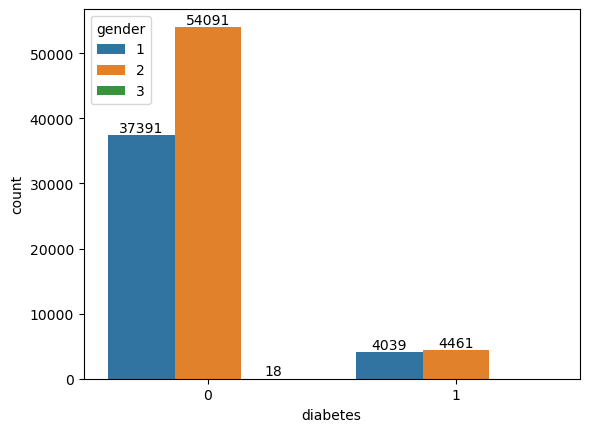

In [11]:
gen=sns.countplot(x='diabetes',data=df2,hue='gender')

for bars in gen.containers:
    gen.bar_label(bars)

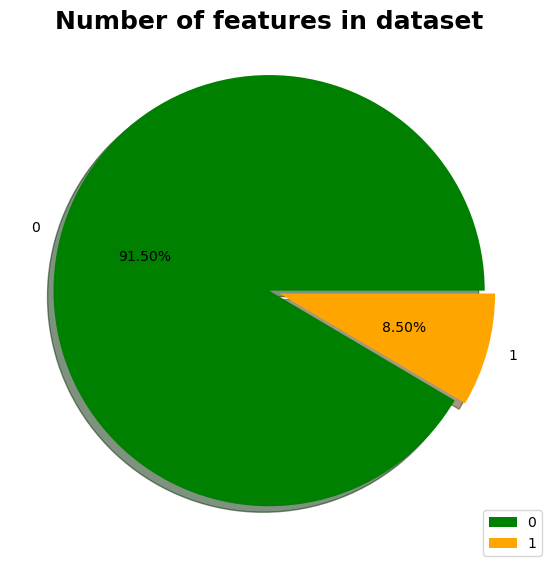

In [12]:
labels = [0, 1]
size = df2['diabetes'].value_counts()
colors = [ 'green', 'orange']
explode = [0.05, 0]
plt.figure(figsize=(8,7))
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.suptitle("Number of features in dataset", y=0.9, size=18,weight="bold")
plt.legend()
plt.show()

# Exploratory Data Analysis (EDA) to check the correlation between features.

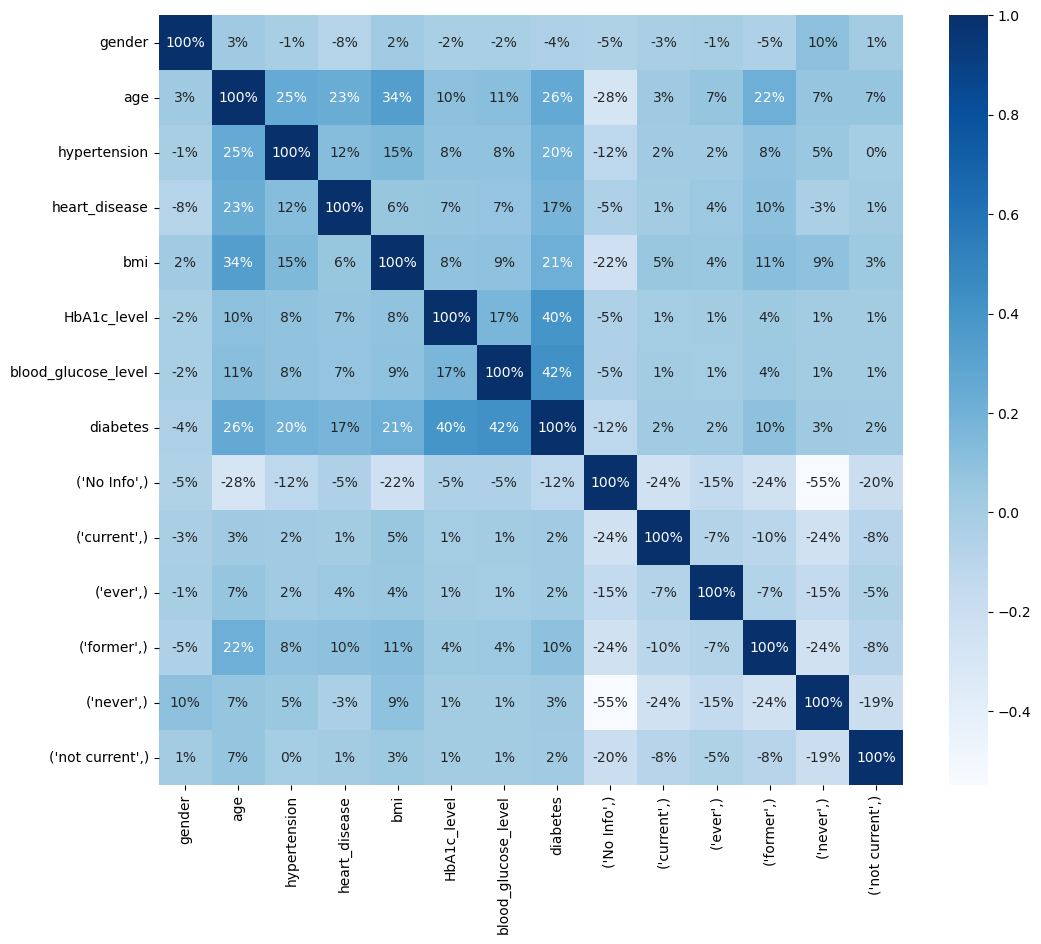

In [13]:
axis = plt.figure(figsize=(12,10))
sns.heatmap(df2.corr() , annot= True , cmap = "Blues" , fmt=".0%")
plt.show()

# Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler().fit(df2.drop("diabetes" , axis=1))

C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [15]:
X= scaler.transform(df2.drop("diabetes" , axis=1))
Y= df2["diabetes"]
X_train , X_test ,Y_train, Y_test=train_test_split(X,Y,test_size=0.10 , random_state=0)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


# Classification

In [16]:
from sklearn.metrics import confusion_matrix , accuracy_score
acc=[]
model_name=['LR','DT','PER','RF','KNN']

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=10000)
model.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=10000, multi_class='multinomial', solver='saga')

In [18]:
y_pred=model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc_lr=accuracy_score(Y_test,y_pred)
acc.append(acc_lr)
acc_lr

0.9613

In [20]:
print(confusion_matrix(Y_test,y_pred))

[[9050   91]
 [ 296  563]]
